In [247]:
import numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, pandas as pd, matplotlib as mpl, seaborn as sns
import statsmodels.api as sm
import matplotlib.cm as cm
from datetime import datetime
from sklearn import linear_model
from scipy.ndimage.filters import gaussian_filter
from sklearn import preprocessing
import statsmodels.api as sm
from patsy import dmatrices
from matplotlib import rcParams

In [248]:
%matplotlib inline

In [249]:
fund1 = pd.read_excel('FundAte4.xls', header = 1) #fonte: CNI
fund1.columns = ['data', 'indice']
fund2 = pd.read_excel('Fund5a8.xls', header = 1)
fund2.columns = ['data', 'indice']
medio = pd.read_excel('medio.xls', header = 1)
medio.columns = ['data', 'indice']
superior = pd.read_excel('superior.xls', header = 1)
superior.columns = ['data', 'indice']

fund1['data'] = pd.to_datetime(fund1['data'])
fund2['data'] = pd.to_datetime(fund2['data'])
medio['data'] = pd.to_datetime(medio['data'])
superior['data'] = pd.to_datetime(superior['data'])

dbpib = pd.read_excel('pibtri.xlsx') #fonte: IPEA
dbinfla = pd.read_excel('inflacao1994.xlsx') #fonte: IBGE

spread = pd.read_excel('spread.xlsx') #fonte: BACEN
spread = spread[:-2]
spread.data = pd.to_datetime(spread.data)

selic = pd.read_excel('SelicValorConsulting.xlsx') #fonte: ValorConsulting
selic  = selic.iloc[:, ::-1]

In [250]:
datarange = pd.date_range(start="1994-07-01", end="2021-04-01", freq = 'MS')
limpainfla = np.hstack(np.array(dbinfla.query('`Variação mensal durante o Plano Real` == "Brasil"')))[2:]
dbinfla = pd.DataFrame({'data': datarange, 'infla': limpainfla})

In [251]:
i = 0
infladot = []
for e in dbinfla.infla:
    infladot.append(dbinfla.infla[i].replace(',', '.'))
    i += 1

In [252]:
infladot = pd.to_numeric(infladot, downcast = "float")

In [253]:
dbinfla = pd.DataFrame({'data': datarange, 'infla': infladot})

In [254]:
tripib = pd.DataFrame({'AnoT': dbpib.AnoT, 'Valor': dbpib.valor})
tripibtrunc = tripib.query('AnoT > "2008 T4" & AnoT != "2021 T1"')
tripibtrunc = tripibtrunc.drop(tripibtrunc.index[[-1, -2]]).reset_index().drop(['index'], axis = 1)
varpib = tripibtrunc[:44]

In [255]:
def compound(a, b, c):
    y = 100*(1 + (a / 100))*(1 + (b / 100))*(1 + (c / 100)) - 100
    return y

def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return zip(a, a, a)

#dbinfla é trimestrizado
inflatrim = []
for x, y, z in pairwise(dbinfla.infla):
    inflatrim.append(compound(x, y, z))
    
fund1repara = pd.DataFrame({'data': ['2020-03-01', '2020-06-01'], 'indice': [np.nan, np.nan]})
fund1repara['data'] = pd.to_datetime(fund1repara['data'])
fund1 = fund1.append(fund1repara)
fund1 = fund1.sort_index(ascending = False).reset_index().reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                                                                   16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
                                                                   30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 
                                                                   46, 44, 45, 47])
fund1 = pd.DataFrame({'data': fund1.data, 'indice': fund1.indice})

In [256]:
spreadtrim = []
for x, y, z in pairwise(spread.SpreadMedioPF):
    spreadtrim.append(compound(x, y, z))

i = 0
selictrim = []
for e in range(len(selic[2009])):
    for x, y, z in pairwise(np.array(list(selic.iloc[i]))):
        selictrim.append(compound(x, y, z))
    i += 1

In [283]:
#ajustamento com spread e fund
selic2011 = selic.drop([2009, 2010, 2020], axis = 1)
selic2019 = selic.drop(2020, axis = 1)

j = 0
selic2011trim = []
for e in range(len(selic2011[2011])):
    for x, y, z in pairwise(np.array(list(selic2011.iloc[j]))):
        selic2011trim.append(compound(x, y, z))
    j += 1
    
k = 0
selic2019trim = []
for e in range(len(selic2019[2019])):
    for x, y, z in pairwise(np.array(list(selic2019.iloc[k]))):
        selic2019trim.append(compound(x, y, z))
    k += 1

selic2011trim = selic2011trim[5:]
len(fund1_red), len(selictrim), len(selic2019trim), len(selic2011trim), len(selic2011trim) == len(spreadtrim)

(44, 48, 36, 31, True)

In [258]:
len(selic)*len(range(2009,2020))/3

44.0

In [259]:
selic2019long = pd.DataFrame()
for e in range(0, len(range(2009, 2020))):
        selic2019long = selic2019novo.append(pd.DataFrame(np.array(selic2019.iloc[e])))
seliclong = selic2019long.reset_index().drop('index', axis = 1).rename({0 : 'selic'}, axis = 1)

In [269]:
m = 0
seliclongtrim = []
for x, y, z in pairwise(seliclong.selic):
    seliclongtrim.append(compound(x, y, z))

In [270]:
len(seliclongtrim)

44

In [190]:
np.array(list(selic2019.iloc[1]))

array([0.86, 0.59, 0.84, 0.75, 0.49, 0.79, 0.82, 1.  , 0.87, 0.47, 0.49])

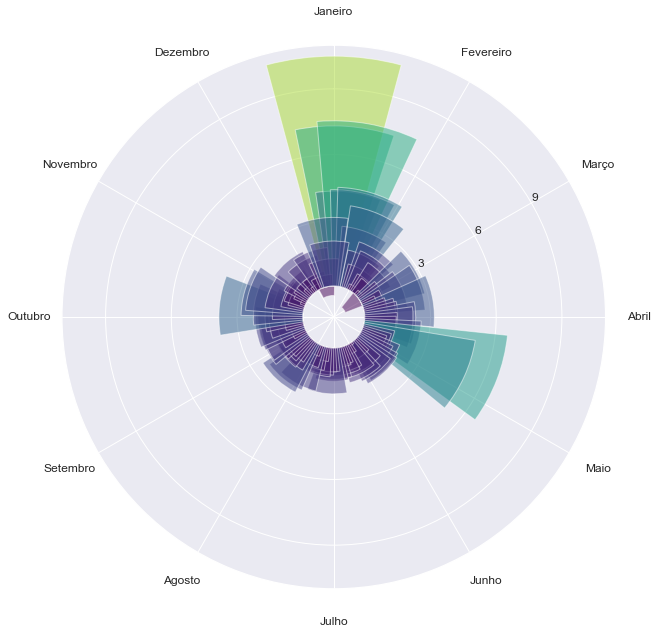

In [146]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 
                                        'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

rodada = range(0, 360, 360 // 12)
N = len(inflatrim)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = np.array(inflatrim)
width = 2*(np.pi) / 12
colors = plt.cm.viridis(np.array(inflatrim) / 12.) 

plt.figure(figsize = (10, 10))
ax = plt.subplot(projection = 'polar')

ax.bar(theta, radii, width = width, bottom = 0., color = colors, alpha = 0.5)
ax.set_rmax(np.array(inflatrim).max() + 0.5)
ax.set_rticks(range(3, 12, 3))
ax.set_rlabel_position(60)

ax.set_thetagrids(rodada, meses)
ax.tick_params(pad = 20, labelsize = 12, rotation = 0)
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

plt.show()

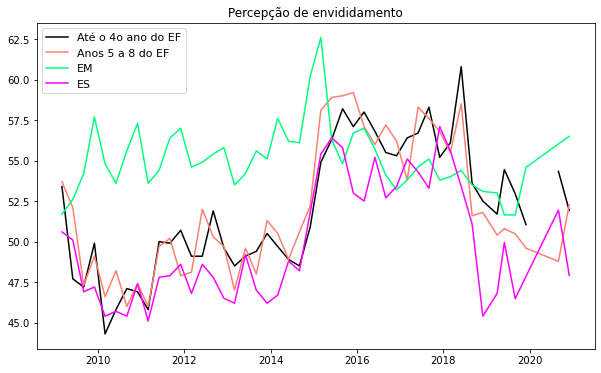

In [26]:
mpl.rcParams['figure.figsize'] = (10,6)
plt.plot(fund1['data'], fund1['indice'], c = 'black', label = 'Até o 4o ano do EF')
plt.plot(fund2['data'], fund2['indice'], c = 'salmon', label = 'Anos 5 a 8 do EF')
plt.plot(medio['data'], medio['indice'], c = 'springgreen', label = 'EM')
plt.plot(superior['data'], superior['indice'], c = 'magenta', label = 'ES')
plt.title('Percepção de envididamento')
plt.legend(fontsize = 11)
plt.show()

In [20]:
#Alinhamento
fund1_red = fund1[:44]
fund2_red = fund2[:44]
medio_red = medio[:44]
superior_red = superior[:44]
dbinfla_red = dbinfla[174:306].reset_index().drop(['index'], axis = 1)
infla_red = []
for x, y, z in pairwise(dbinfla_red.infla):
    infla_red.append(compound(x, y, z))

In [273]:
regmatrix = pd.DataFrame({'fund1_red_indice': fund1_red.indice, 'infla_red': infla_red, 'varpib': varpib.Valor, 
                          'selic': seliclongtrim})

In [278]:
y, X = dmatrices('fund1_red_indice ~ infla_red + varpib + selic', data = regmatrix, return_type = 'dataframe')
fund1_model = sm.OLS(y, X)
res1 = fund1_model.fit()
res1.pvalues[0], res1.pvalues[1], res1.pvalues[2]

(5.002723969865466e-22, 0.4669922148616159, 2.2629226144123725e-06)

In [279]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:       fund1_red_indice   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     10.15
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           4.23e-05
Time:                        09:56:35   Log-Likelihood:                -110.68
No. Observations:                  44   AIC:                             229.4
Df Residuals:                      40   BIC:                             236.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.2141      2.884     19.488      0.0

In [280]:
sm.stats.linear_rainbow(res1)

(3.446387862934244, 0.004993917204320224)

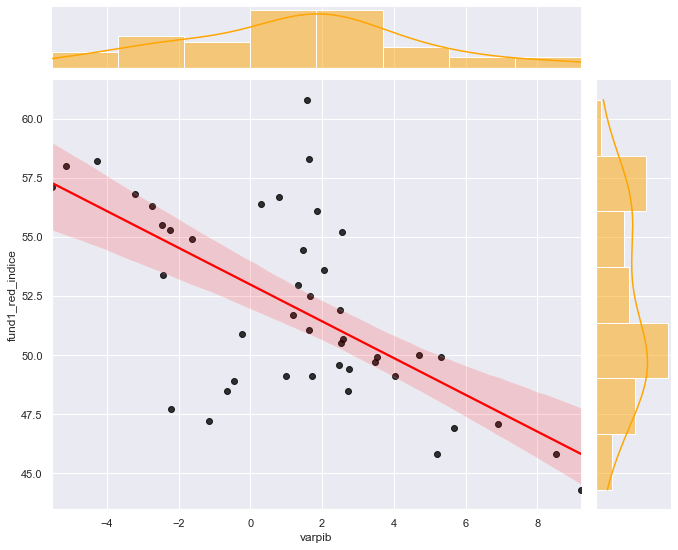

In [284]:
grid = sns.jointplot(x = 'varpib', y = 'fund1_red_indice', data = regmatrix, kind = 'reg', scatter_kws={"color": "black"}, 
              line_kws={"color": "red"}, marginal_kws={'color': 'orange'}, ratio = 6)
grid.fig.set_figheight(8)
grid.fig.set_figwidth(10)